In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

Saving figure sigmoid_saturation_plot


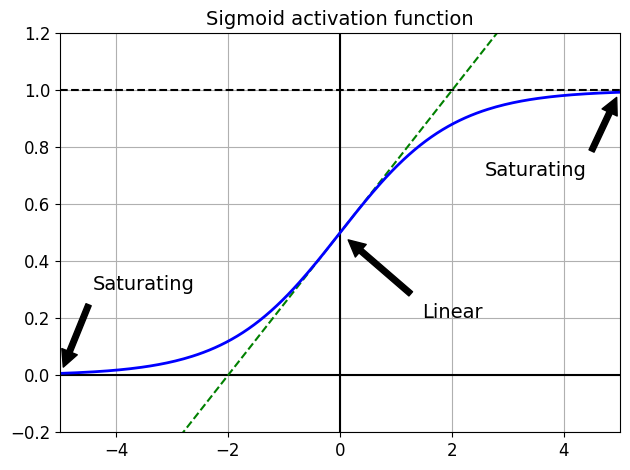

In [3]:

z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("sigmoid_saturation_plot")
plt.show()

In [4]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [5]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [6]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

In [7]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

Saving figure leaky_relu_plot


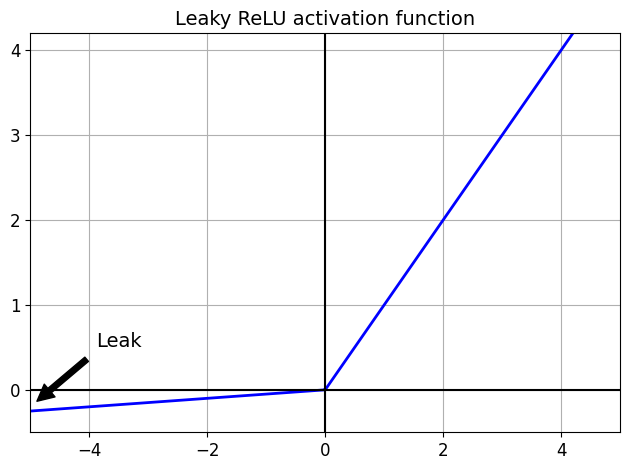

In [8]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig("leaky_relu_plot")
plt.show()

In [9]:

[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [10]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [11]:

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [14]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 2ms/step - loss: 1.2104 - accuracy: 0.6347 - val_loss: 0.8580 - val_accuracy: 0.7212
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7803 - accuracy: 0.7423 - val_loss: 0.7029 - val_accuracy: 0.7668
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6752 - accuracy: 0.7741 - val_loss: 0.6388 - val_accuracy: 0.7890
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6178 - accuracy: 0.7942 - val_loss: 0.5867 - val_accuracy: 0.8044
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5806 - accuracy: 0.8053 - val_loss: 0.5552 - val_accuracy: 0.8176
Epoch 6/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5536 - accuracy: 0.8136 - val_loss: 0.5332 - val_accuracy: 0.8270
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5333 - accuracy: 0.8198 - val_loss: 0.5139 - val_accuracy:

In [15]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [17]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.3470 - accuracy: 0.6058 - val_loss: 0.8969 - val_accuracy: 0.7256
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8019 - accuracy: 0.7492 - val_loss: 0.7117 - val_accuracy: 0.7758
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6838 - accuracy: 0.7789 - val_loss: 0.6427 - val_accuracy: 0.7890
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6239 - accuracy: 0.7965 - val_loss: 0.5882 - val_accuracy: 0.8078
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5855 - accuracy: 0.8063 - val_loss: 0.5569 - val_accuracy: 0.8214
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5578 - accuracy: 0.8137 - val_loss: 0.5336 - val_accuracy: 0.8230
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5366 - accuracy: 0.8198 - val_loss: 0.5148 - val_accuracy:

In [18]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

Saving figure elu_plot


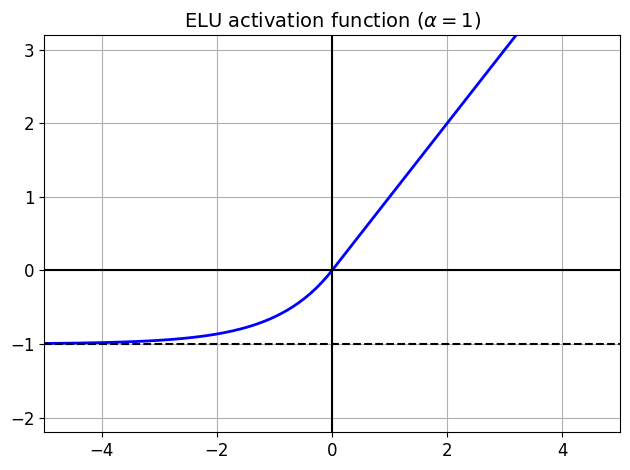

In [19]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("elu_plot")
plt.show()

In [20]:

keras.layers.Dense(10, activation="elu")

In [21]:

from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [22]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

Saving figure selu_plot


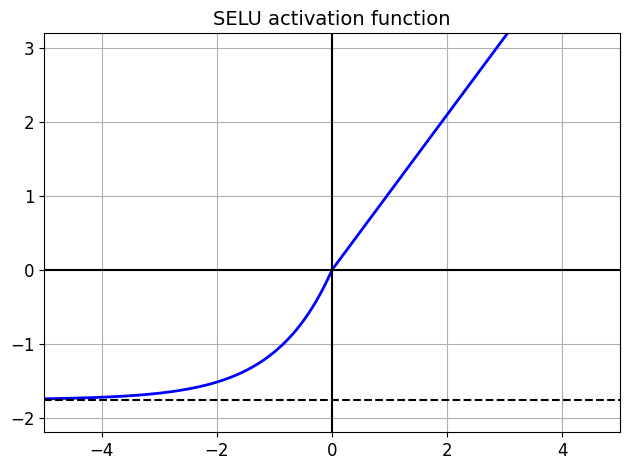

In [23]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("selu_plot")
plt.show()

In [24]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [25]:

keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

In [26]:
np.random.seed(42)
tf.random.set_seed(42)

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [29]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [30]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 35s 19ms/step - loss: 1.1190 - accuracy: 0.5663 - val_loss: 0.8765 - val_accuracy: 0.7068
Epoch 2/5
1719/1719 [==============================] - 30s 18ms/step - loss: 0.8216 - accuracy: 0.7077 - val_loss: 0.9957 - val_accuracy: 0.6740
Epoch 3/5
1719/1719 [==============================] - 30s 18ms/step - loss: 0.6841 - accuracy: 0.7575 - val_loss: 0.6127 - val_accuracy: 0.7858
Epoch 4/5
1719/1719 [==============================] - 31s 18ms/step - loss: 0.6152 - accuracy: 0.7809 - val_loss: 0.5381 - val_accuracy: 0.8096
Epoch 5/5
1719/1719 [==============================] - 30s 18ms/step - loss: 0.5265 - accuracy: 0.8135 - val_loss: 0.5065 - val_accuracy: 0.8236


In [31]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [32]:

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [33]:

history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 32s 17ms/step - loss: 2.0603 - accuracy: 0.1899 - val_loss: 1.8539 - val_accuracy: 0.2404
Epoch 2/5
1719/1719 [==============================] - 28s 16ms/step - loss: 1.6539 - accuracy: 0.3507 - val_loss: 1.7038 - val_accuracy: 0.3068
Epoch 3/5
1719/1719 [==============================] - 28s 16ms/step - loss: 1.2197 - accuracy: 0.4735 - val_loss: 0.9856 - val_accuracy: 0.6136
Epoch 4/5
1719/1719 [==============================] - 28s 16ms/step - loss: 1.0193 - accuracy: 0.6061 - val_loss: 0.9733 - val_accuracy: 0.6204
Epoch 5/5
1719/1719 [==============================] - 27s 16ms/step - loss: 0.9534 - accuracy: 0.6307 - val_loss: 0.7430 - val_accuracy: 0.7124


In [34]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_212 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_213 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [36]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [38]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8468 - accuracy: 0.7129 - val_loss: 0.5574 - val_accuracy: 0.8128
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5712 - accuracy: 0.8017 - val_loss: 0.4824 - val_accuracy: 0.8378
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5180 - accuracy: 0.8191 - val_loss: 0.4475 - val_accuracy: 0.8478
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4803 - accuracy: 0.8320 - val_loss: 0.4260 - val_accuracy: 0.8572
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4549 - accuracy: 0.8403 - val_loss: 0.4117 - val_accuracy: 0.8578
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4386 - accuracy: 0.8444 - val_loss: 0.4003 - val_accuracy: 0.8628
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4252 - accuracy: 0.8510 - val_loss: 0.3888 - val_accuracy:

In [39]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [40]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [41]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0578 - accuracy: 0.6741 - val_loss: 0.6776 - val_accuracy: 0.7954
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6788 - accuracy: 0.7830 - val_loss: 0.5628 - val_accuracy: 0.8200
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5997 - accuracy: 0.8015 - val_loss: 0.5100 - val_accuracy: 0.8330
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5500 - accuracy: 0.8165 - val_loss: 0.4759 - val_accuracy: 0.8430
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5176 - accuracy: 0.8249 - val_loss: 0.4528 - val_accuracy: 0.8502
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4953 - accuracy: 0.8309 - val_loss: 0.4348 - val_accuracy: 0.8566
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4768 - accuracy: 0.8361 - val_loss: 0.4208 - val_accuracy:

In [42]:

optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [43]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

In [44]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [45]:
X_train_A.shape

(43986, 28, 28)

In [46]:
X_train_B.shape

(200, 28, 28)

In [47]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [48]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [49]:
tf.random.set_seed(42)
np.random.seed(42)

In [50]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [51]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [52]:

history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 5s 3ms/step - loss: 0.5586 - accuracy: 0.8214 - val_loss: 0.3873 - val_accuracy: 0.8655
Epoch 2/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3552 - accuracy: 0.8760 - val_loss: 0.3276 - val_accuracy: 0.8842
Epoch 3/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3216 - accuracy: 0.8867 - val_loss: 0.3032 - val_accuracy: 0.8961
Epoch 4/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3025 - accuracy: 0.8945 - val_loss: 0.2899 - val_accuracy: 0.8996
Epoch 5/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2894 - accuracy: 0.9000 - val_loss: 0.2797 - val_accuracy: 0.9061
Epoch 6/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2794 - accuracy: 0.9032 - val_loss: 0.2759 - val_accuracy: 0.9038
Epoch 7/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2709 - accuracy: 0.9073 - val_loss: 0.2712 - val_accuracy:

In [54]:
model_A.save("my_model_A.h5")

In [55]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [56]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [57]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 50ms/step - loss: 0.3992 - accuracy: 0.8400 - val_loss: 0.3896 - val_accuracy: 0.8418
Epoch 2/20
7/7 [==============================] - 0s 25ms/step - loss: 0.3361 - accuracy: 0.8850 - val_loss: 0.3368 - val_accuracy: 0.8976
Epoch 3/20
7/7 [==============================] - 0s 19ms/step - loss: 0.2878 - accuracy: 0.9150 - val_loss: 0.2998 - val_accuracy: 0.9199
Epoch 4/20
7/7 [==============================] - 0s 17ms/step - loss: 0.2533 - accuracy: 0.9300 - val_loss: 0.2702 - val_accuracy: 0.9320
Epoch 5/20
7/7 [==============================] - 0s 16ms/step - loss: 0.2254 - accuracy: 0.9550 - val_loss: 0.2442 - val_accuracy: 0.9452
Epoch 6/20
7/7 [==============================] - 0s 22ms/step - loss: 0.2002 - accuracy: 0.9800 - val_loss: 0.2233 - val_accuracy: 0.9544
Epoch 7/20
7/7 [==============================] - 0s 19ms/step - loss: 0.1804 - accuracy: 0.9850 - val_loss: 0.2065 - val_accuracy: 0.9564
Epoch 8/20
7/7 [===========

In [58]:
model_B.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_224 (Dense)           (None, 300)               235500    
                                                                 
 dense_225 (Dense)           (None, 100)               30100     
                                                                 
 dense_226 (Dense)           (None, 50)                5050      
                                                                 
 dense_227 (Dense)           (None, 50)                2550      
                                                                 
 dense_228 (Dense)           (None, 50)                2550      
                                                                 
 dense_229 (Dense)           (None, 1)                

In [59]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [60]:

model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [61]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [62]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 47ms/step - loss: 0.9578 - accuracy: 0.4400 - val_loss: 0.9189 - val_accuracy: 0.4371
Epoch 2/4
7/7 [==============================] - 0s 20ms/step - loss: 0.8786 - accuracy: 0.4600 - val_loss: 0.8393 - val_accuracy: 0.4686
Epoch 3/4
7/7 [==============================] - 0s 20ms/step - loss: 0.7992 - accuracy: 0.5000 - val_loss: 0.7718 - val_accuracy: 0.4939
Epoch 4/4
7/7 [==============================] - 0s 18ms/step - loss: 0.7322 - accuracy: 0.5500 - val_loss: 0.7131 - val_accuracy: 0.5264
Epoch 1/16
7/7 [==============================] - 1s 48ms/step - loss: 0.5753 - accuracy: 0.6750 - val_loss: 0.4381 - val_accuracy: 0.7941
Epoch 2/16
7/7 [==============================] - 0s 19ms/step - loss: 0.3596 - accuracy: 0.8550 - val_loss: 0.2976 - val_accuracy: 0.9260
Epoch 3/16
7/7 [==============================] - 0s 18ms/step - loss: 0.2482 - accuracy: 0.9500 - val_loss: 0.2252 - val_accuracy: 0.9615
Epoch 4/16
7/7 [===============

In [63]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.1053 - accuracy: 0.9840


[0.10530354082584381, 0.984000027179718]

In [64]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0631 - accuracy: 0.9930


[0.06312940269708633, 0.9929999709129333]

In [65]:
(100 - 97.05) / (100 - 99.40)

4.916666666666718

In [66]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [67]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

In [68]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

In [69]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [70]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [71]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [72]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [73]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [74]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [75]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4874 - accuracy: 0.8288 - val_loss: 0.4029 - val_accuracy: 0.8578
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3810 - accuracy: 0.8649 - val_loss: 0.3692 - val_accuracy: 0.8652
Epoch 3/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3480 - accuracy: 0.8764 - val_loss: 0.3752 - val_accuracy: 0.8670
Epoch 4/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3274 - accuracy: 0.8831 - val_loss: 0.3490 - val_accuracy: 0.8764
Epoch 5/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3124 - accuracy: 0.8898 - val_loss: 0.3410 - val_accuracy: 0.8758
Epoch 6/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2989 - accuracy: 0.8938 - val_loss: 0.3402 - val_accuracy: 0.8794
Epoch 7/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2890 - accuracy: 0.8978 - val_loss: 0.3347 - val_accuracy:

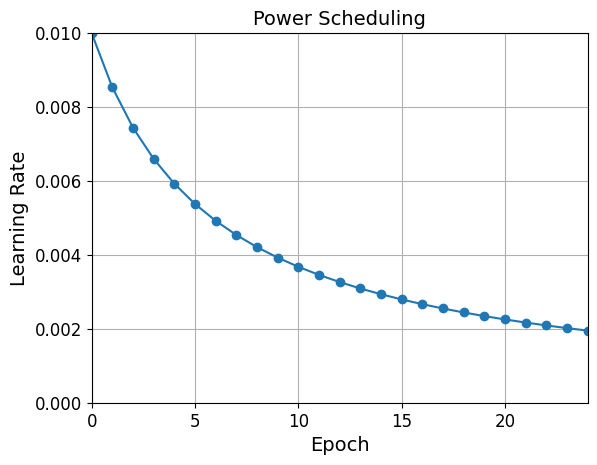

In [76]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [77]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [78]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [79]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.8583 - accuracy: 0.7538 - val_loss: 0.8288 - val_accuracy: 0.7452 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7161 - accuracy: 0.7797 - val_loss: 0.7212 - val_accuracy: 0.7528 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6644 - accuracy: 0.8019 - val_loss: 0.8253 - val_accuracy: 0.7910 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5837 - accuracy: 0.8248 - val_loss: 0.5233 - val_accuracy: 0.8474 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5278 - accuracy: 0.8394 - val_loss: 0.5455 - val_accuracy: 0.8350 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4746 - accuracy: 0.8542 - val_loss: 0.5394 - val_accuracy: 0.8578 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 

In [ ]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()